In [12]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.api import VAR, DynamicVAR
from statsmodels.tsa.base.datetools import dates_from_str
from statsmodels.tsa.vector_ar import plotting
import matplotlib.pyplot as plt

In [128]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [148]:
dataset=pd.read_csv('dataset_stationary.csv',sep=',',index_col=0)

In [149]:
initial=dataset['Beer'][0]
end=dataset['Beer'][-1]

In [150]:
adf_test(dataset['Beer'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.973067
p-value                          0.298506
#Lags Used                      17.000000
Number of Observations Used    404.000000
Critical Value (1%)             -3.446640
Critical Value (5%)             -2.868721
Critical Value (10%)            -2.570595
dtype: float64


In [152]:
model = VAR(dataset)

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [153]:
results = model.fit()
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 23, Apr, 2019
Time:                     20:54:43
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    44.7285
Nobs:                     421.000    HQIC:                   44.4845
Log likelihood:          -12872.7    FPE:                1.77902e+19
AIC:                      44.3252    Det(Omega_mle):     1.61143e+19
--------------------------------------------------------------------
Results for equation Beer
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      24.919009         7.722018            3.227           0.001
L1.Beer                     0.815589         0.031621           25.793           0.000
L1.Car                      0.000500 

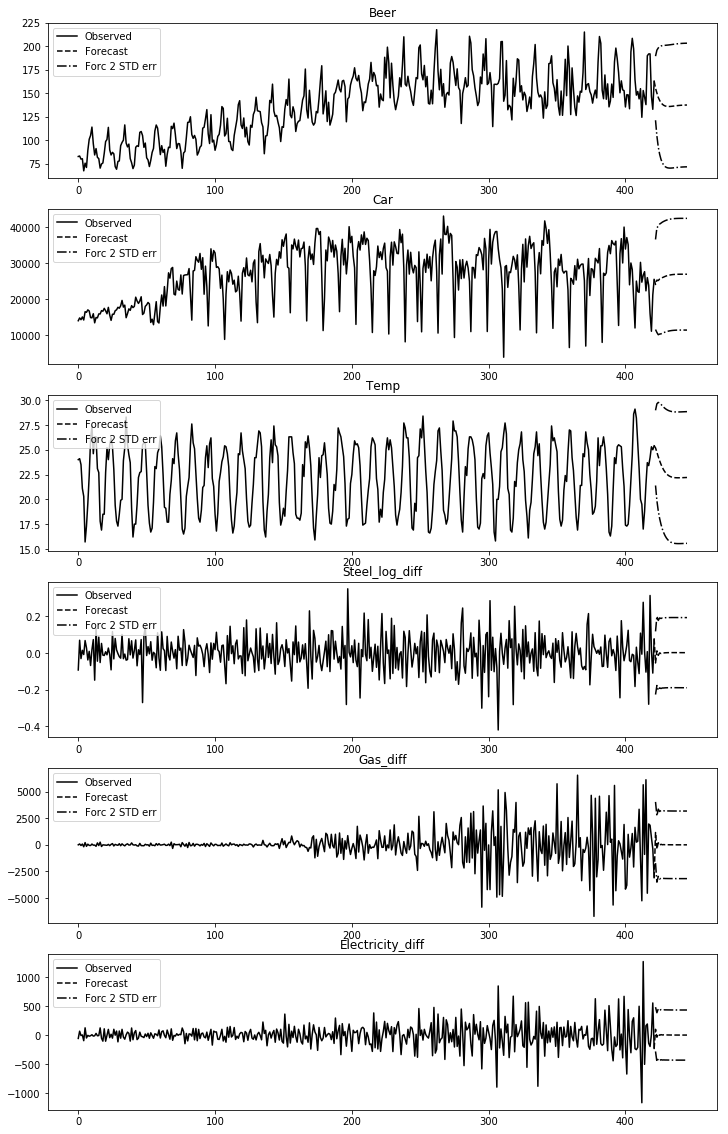

In [156]:
mid, lower, upper = results.forecast_interval(results.y[-results.k_ar:], steps=24,
                                           alpha=0.05)
fig = plotting.plot_var_forc(results.y, mid, lower, upper,
                             names=results.names, plot_stderr=True,fig=plt.figure(figsize=(12,20)))

In [104]:
s=np.ones(shape=(24,3))*end

In [143]:
s

array([[163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.],
       [163., 163., 163.]])

In [146]:
a=np.stack((lower[:,0],mid[:,0],upper[:,0]),axis=1)
a_cum=np.cumsum(a,axis=0)

In [147]:
s+a_cum

array([[ 114.80445539,  149.0426225 ,  183.2807896 ],
       [  74.93752275,  146.23808558,  217.5386484 ],
       [  33.12152066,  141.95795755,  250.79439444],
       [  -6.8756511 ,  139.71754161,  286.31073432],
       [ -46.7634382 ,  137.67848408,  322.12040637],
       [ -85.9427135 ,  136.39999752,  358.74270854],
       [-124.85642392,  135.41359364,  395.68361119],
       [-163.44821809,  134.76410384,  432.97642577],
       [-201.84889302,  134.3137431 ,  470.47637922],
       [-240.08559336,  134.03177437,  508.1491421 ],
       [-278.20880312,  133.865684  ,  545.94017112],
       [-316.24433654,  133.78857106,  583.82147865],
       [-354.21633989,  133.77569266,  621.7677252 ],
       [-392.14086115,  133.81067826,  659.76221768],
       [-430.03055911,  133.88069378,  697.79194668],
       [-467.89451234,  133.97656579,  735.84764391],
       [-505.73953831,  134.09142542,  773.92238915],
       [-543.57062551,  134.22025644,  812.0111384 ],
       [-581.391465  ,  134.

In [67]:
Beer=dataset[['Beer']]

In [71]:
Beer['Beer']=initial

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [76]:
dataset.cumsum()[['Beer']]+Beer

Beer
Date             
1957-03-01   83.3
1957-04-01   80.0
1957-05-01   80.4
1957-06-01   67.5
1957-07-01   75.7
1957-08-01   71.1
1957-09-01   89.3
1957-10-01  101.1
1957-11-01  105.2
1957-12-01  114.1
1958-01-01   96.3
1958-02-01   84.4
1958-03-01   91.2
1958-04-01   81.9
1958-05-01   80.5
1958-06-01   70.4
1958-07-01   74.8
1958-08-01   75.9
1958-09-01   86.3
1958-10-01   98.7
1958-11-01  100.9
1958-12-01  113.8
1959-01-01   89.8
1959-02-01   84.4
1959-03-01   87.2
1959-04-01   85.6
1959-05-01   72.0
1959-06-01   69.2
1959-07-01   77.5
1959-08-01   78.1
...           ...
1989-10-01  183.5
1989-11-01  198.2
1989-12-01  186.8
1990-01-01  172.0
1990-02-01  150.6
1990-03-01  163.3
1990-04-01  153.7
1990-05-01  152.9
1990-06-01  135.5
1990-07-01  148.5
1990-08-01  148.4
1990-09-01  133.6
1990-10-01  194.1
1990-11-01  208.6
1990-12-01  197.3
1991-01-01  164.4
1991-02-01  148.1
1991-03-01  152.0
1991-04-01  144.1
1991-05-01  155.0
1991-06-01  124.5
1991-07-01  153.0
1991-08-01  146.0
1991-09-01  138.0
1991-10-01  190.0
1991-11-01  192.0
1991-12-01  192.0
1992-01-01  147.0
1992-02-01  133.0
1992-03-01  163.0

[421 rows x 1 columns]